<a href="https://colab.research.google.com/github/Marcin19721205/MachineLearingBootCampPartII/blob/main/01_kmeans_implementationMJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* @author: krakowiakpawel9@gmail.com  
* @site: e-smartdata.org

### scikit-learn
Strona biblioteki: [https://scikit-learn.org](https://scikit-learn.org)  

Dokumentacja/User Guide: [https://scikit-learn.org/stable/user_guide.html](https://scikit-learn.org/stable/user_guide.html)

Podstawowa biblioteka do uczenia maszynowego w języku Python.

Aby zainstalować bibliotekę scikit-learn, użyj polecenia poniżej:
```
!pip install scikit-learn
```
Aby zaktualizować do najnowszej wersji bibliotekę scikit-learn, użyj polecenia poniżej:
```
!pip install --upgrade scikit-learn
```
Kurs stworzony w oparciu o wersję `0.22.1`

### Spis treści:
1. [Import bibliotek](#0)
2. [Wygenerowanie danych](#1)
3. [Wizualizacja danych](#2)
4. [Implementacja algorytmu K-średnich](#3)
5. [Implementacja algorytmu K-średnich - podsumowanie](#4)
6. [Implementacja algorytmu K-średnich - wizualizacja](#5)



#Metryka Euklidesowa

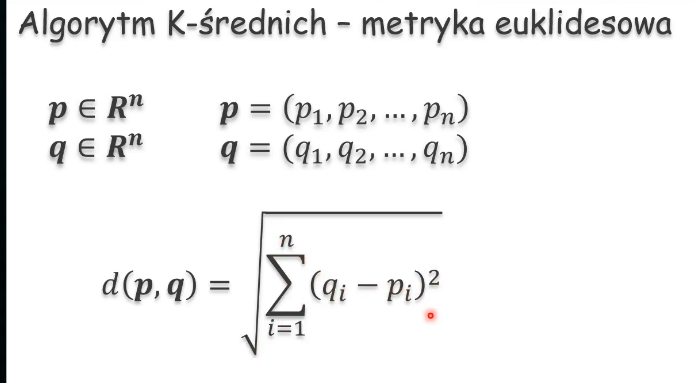

### <a name='0'></a> Import bibliotek

In [2]:
import numpy as np
from numpy.linalg import norm
import pandas as pd
import random
import plotly.express as px
import plotly.graph_objects as go

np.random.seed(42)
np.set_printoptions(precision=6)
random.seed(41)

### <a name='1'></a> Wygenerowanie danych

In [5]:
from sklearn.datasets import make_blobs #funkcja do generacji danych

data = make_blobs(n_samples=40, centers=2, cluster_std=1.0, center_box=(-4.0, 4.0), random_state=42)[0]
df = pd.DataFrame(data, columns=['x1', 'x2'])
df.head()

,x1,x2
0,0.377430,0.069424
1,2.217347,2.327304
2,1.376777,0.603609
3,-1.467097,3.139985
4,-1.605386,5.457993


### <a name='2'></a> Wizualizacja danych

In [6]:
fig = px.scatter(df, 'x1', 'x2', width=950, height=500, title='Algorytm K-średnich')
fig.update_traces(marker_size=12)

### <a name='3'></a> Implementacja algorytmu K-średnich

In [7]:
# wyznaczenie wartości brzegowych jako min/max każdej ze zmiennych x1/x2
x1_min = df.x1.min() #znajdz min x1
x1_max = df.x1.max() #znajdz max x1

x2_min = df.x2.min()
x2_max = df.x2.max()

print(x1_min, x1_max)
print(x2_min, x2_max)

-2.728596881734133 3.333845579232757
-1.1983010410246 5.457992635788267


In [8]:
# losowe wygnererowanie współrzędnych centroidów
centroid_1 = np.array([random.uniform(x1_min, x1_max), random.uniform(x2_min, x2_max)])
centroid_2 = np.array([random.uniform(x1_min, x1_max), random.uniform(x2_min, x2_max)])
print(centroid_1)
print(centroid_2)

[-0.418681  0.337434]
[-1.722009  4.884443]


In [10]:
# wizualizacja tzw. punktów startowych centroidów
fig = px.scatter(df, 'x1', 'x2', width=950, height=500, title='Algorytm K-średnich - inicjalizacja centroidów')
fig.add_trace(go.Scatter(x=[centroid_1[0]], y=[centroid_1[1]], name='centroid 1', mode='markers', marker_line_width=3))
fig.add_trace(go.Scatter(x=[centroid_2[0]], y=[centroid_2[1]], name='centroid 2', mode='markers', marker_line_width=3))
fig.update_traces(marker_size=12, showlegend=False)

In [11]:
# przypisanie punktów do najbliższego centroidu
clusters = []
for point in data:
    centroid_1_dist = norm(centroid_1 - point)
    centroid_2_dist = norm(centroid_2 - point)
    cluster = 1
    if centroid_1_dist > centroid_2_dist:
        cluster = 2
    clusters.append(cluster)

df['cluster'] = clusters
df.head()

,x1,x2,cluster
0,0.377430,0.069424,1
1,2.217347,2.327304,1
2,1.376777,0.603609,1
3,-1.467097,3.139985,2
4,-1.605386,5.457993,2


In [12]:
# wizualizacja przypisania
fig = px.scatter(df, 'x1', 'x2', color='cluster', width=950, height=500,
                 title='Algorytm K-średnich - iteracja 1 - przypisanie punktów do najbliższego centroidu')
fig.add_trace(go.Scatter(x=[centroid_1[0]], y=[centroid_1[1]], name='centroid 1', mode='markers', marker_line_width=3))
fig.add_trace(go.Scatter(x=[centroid_2[0]], y=[centroid_2[1]], name='centroid 2', mode='markers', marker_line_width=3))
fig.update_traces(marker_size=12)
fig.update_layout(showlegend=False)

In [13]:
# obliczenie nowych współrzędnych centroidów
new_centroid_1 = [df[df.cluster == 1].x1.mean(), df[df.cluster == 1].x2.mean()]
new_centroid_2 = [df[df.cluster == 2].x1.mean(), df[df.cluster == 2].x2.mean()]

print(new_centroid_1, new_centroid_2)

[np.float64(1.1057883070617118), np.float64(1.1784295565923741)] [np.float64(-1.322466347597972), np.float64(3.7664746248027723)]


In [17]:
# wizualizacja aktualizacji centroidów
#centroid jest przesuwany w miejsace avg przydzielonych punktów
fig = px.scatter(df, 'x1', 'x2', color='cluster', width=950, height=500,
                 title='Algorytm K-średnich - obliczenie nowych centroidów')
fig.add_trace(go.Scatter(x=[centroid_1[0]], y=[centroid_1[1]], name='centroid 1', mode='markers', marker_line_width=1)) #stare
fig.add_trace(go.Scatter(x=[centroid_2[0]], y=[centroid_2[1]], name='centroid 2', mode='markers', marker_line_width=1))
fig.add_trace(go.Scatter(x=[new_centroid_1[0]], y=[new_centroid_1[1]], name='centroid 1', mode='markers', marker_line_width=3)) #nowe
fig.add_trace(go.Scatter(x=[new_centroid_2[0]], y=[new_centroid_2[1]], name='centroid 2', mode='markers', marker_line_width=3))
fig.update_traces(marker_size=12)
fig.update_layout(showlegend=False)

In [18]:
fig = px.scatter(df, 'x1', 'x2', color='cluster', width=950, height=500,
                 title='Algorytm K-średnich - aktualizacja centroidów')
fig.add_trace(go.Scatter(x=[new_centroid_1[0]], y=[new_centroid_1[1]], name='centroid 1', mode='markers', marker_line_width=3))
fig.add_trace(go.Scatter(x=[new_centroid_2[0]], y=[new_centroid_2[1]], name='centroid 2', mode='markers', marker_line_width=3))
fig.update_traces(marker_size=12)
fig.update_layout(showlegend=False)

In [19]:
# ponowne przypisanie punktów do najbliższego centroidu
clusters = []
for point in data:
    centroid_1_dist = norm(new_centroid_1 - point)
    centroid_2_dist = norm(new_centroid_2 - point)
    cluster = 1
    if centroid_1_dist > centroid_2_dist:
        cluster = 2
    clusters.append(cluster)

df['cluster'] = clusters
df.head()

,x1,x2,cluster
0,0.377430,0.069424,1
1,2.217347,2.327304,1
2,1.376777,0.603609,1
3,-1.467097,3.139985,2
4,-1.605386,5.457993,2


In [20]:
fig = px.scatter(df, 'x1', 'x2', color='cluster', width=950, height=500,
                 title='Algorytm K-średnich - iteracja 2 - ponowne przypisanie punktów')
fig.add_trace(go.Scatter(x=[new_centroid_1[0]], y=[new_centroid_1[1]], name='centroid 1', mode='markers', marker_line_width=3))
fig.add_trace(go.Scatter(x=[new_centroid_2[0]], y=[new_centroid_2[1]], name='centroid 2', mode='markers', marker_line_width=3))
fig.update_traces(marker_size=12)
fig.update_layout(showlegend=False)

In [21]:
# aktualizacja centroidów
new_2_centroid_1 = [df[df.cluster == 1].x1.mean(), df[df.cluster == 1].x2.mean()]
new_2_centroid_2 = [df[df.cluster == 2].x1.mean(), df[df.cluster == 2].x2.mean()]

print(new_2_centroid_1, new_2_centroid_2)

[np.float64(1.4180663576886534), np.float64(1.0311646927855822)] [np.float64(-1.316444653506243), np.float64(3.5090014873277737)]


In [22]:
# aktualizacja centroidów
fig = px.scatter(df, 'x1', 'x2', color='cluster', width=950, height=500,
                 title='Algorytm K-średnich - ponowne obliczenie centroidów')
fig.add_trace(go.Scatter(x=[new_centroid_1[0]], y=[new_centroid_1[1]], name='centroid 1', mode='markers', marker_line_width=3))
fig.add_trace(go.Scatter(x=[new_centroid_2[0]], y=[new_centroid_2[1]], name='centroid 2', mode='markers', marker_line_width=3))
fig.add_trace(go.Scatter(x=[new_2_centroid_1[0]], y=[new_2_centroid_1[1]], name='centroid 1', mode='markers', marker_line_width=3))
fig.add_trace(go.Scatter(x=[new_2_centroid_2[0]], y=[new_2_centroid_2[1]], name='centroid 2', mode='markers', marker_line_width=3))
fig.update_traces(marker_size=12)
fig.update_layout(showlegend=False)

In [23]:
clusters = []
for point in data:
    centroid_1_dist = norm(new_centroid_1 - point)
    centroid_2_dist = norm(new_centroid_2 - point)
    cluster = 1
    if centroid_1_dist > centroid_2_dist:
        cluster = 2
    clusters.append(cluster)

df['cluster'] = clusters
df.head()

,x1,x2,cluster
0,0.377430,0.069424,1
1,2.217347,2.327304,1
2,1.376777,0.603609,1
3,-1.467097,3.139985,2
4,-1.605386,5.457993,2


In [24]:
fig = px.scatter(df, 'x1', 'x2', color='cluster', width=950, height=500,
                 title='Algorytm K-średnich - aktualzacja centroidów')
fig.add_trace(go.Scatter(x=[new_2_centroid_1[0]], y=[new_2_centroid_1[1]], name='centroid 1', mode='markers', marker_line_width=3))
fig.add_trace(go.Scatter(x=[new_2_centroid_2[0]], y=[new_2_centroid_2[1]], name='centroid 2', mode='markers', marker_line_width=3))
fig.update_traces(marker_size=12)
fig.update_layout(showlegend=False)

### <a name='4'></a> Implementacja algorytmu K-średnich - podsumowanie

In [25]:
data = make_blobs(n_samples=40, centers=2, cluster_std=1.0, center_box=(-4.0, 4.0), random_state=42)[0]
df = pd.DataFrame(data, columns=['x1', 'x2'])
df.head()

x1_min = df.x1.min()
x1_max = df.x1.max()

x2_min = df.x2.min()
x2_max = df.x2.max()

centroid_1 = np.array([random.uniform(x1_min, x1_max), random.uniform(x2_min, x2_max)])
centroid_2 = np.array([random.uniform(x1_min, x1_max), random.uniform(x2_min, x2_max)])

for i in range(10):
    clusters = []
    for point in data:
        centroid_1_dist = norm(centroid_1 - point)
        centroid_2_dist = norm(centroid_2 - point)
        cluster = 1
        if centroid_1_dist > centroid_2_dist:
            cluster = 2
        clusters.append(cluster)

    df['cluster'] = clusters

    centroid_1 = [df[df.cluster == 1].x1.mean(), df[df.cluster == 1].x2.mean()]
    centroid_2 = [df[df.cluster == 2].x1.mean(), df[df.cluster == 2].x2.mean()]

print(new_centroid_1, new_centroid_2)

[np.float64(1.1057883070617118), np.float64(1.1784295565923741)] [np.float64(-1.322466347597972), np.float64(3.7664746248027723)]


### <a name='5'></a> Implementacja algorytmu K-średnich - wizualizacja

In [26]:
fig = px.scatter(df, 'x1', 'x2', color='cluster', width=950, height=500,
                 title='Algorytm K-średnich - końcowy rezultat')
fig.add_trace(go.Scatter(x=[new_2_centroid_1[0]], y=[new_2_centroid_1[1]], name='centroid 1', mode='markers', marker_line_width=3))
fig.add_trace(go.Scatter(x=[new_2_centroid_2[0]], y=[new_2_centroid_2[1]], name='centroid 2', mode='markers', marker_line_width=3))
fig.update_traces(marker_size=12)
fig.update_layout(showlegend=False)